In [1]:
import pandas as pd
df = pd.read_csv("county.csv", sep=",")
# remove extraneous columns
df.drop(df.columns[[0,1,3,5,6,7,8]], axis=1, inplace=True)
print(df.head(10))
print("shape: " + str(df.shape))

           RegionName StateName  1996-01-31  1996-02-29  1996-03-31  \
0  Los Angeles County        CA    180856.0    180903.0    180992.0   
1         Cook County        IL    151739.0    151513.0    151163.0   
2       Harris County        TX    102209.0    102281.0    102292.0   
3     Maricopa County        AZ    121139.0    121478.0    121863.0   
4    San Diego County        CA    194522.0    194186.0    194005.0   
5       Orange County        CA    224601.0    225520.0    225410.0   
6        Kings County        NY    214461.0    213803.0    213384.0   
7   Miami-Dade County        FL    122564.0    122718.0    122890.0   
8       Dallas County        TX     98322.0     98383.0     98588.0   
9       Queens County        NY    223504.0    223046.0    222935.0   

   1996-04-30  1996-05-31  1996-06-30  1996-07-31  1996-08-31  ...  \
0    181173.0    181344.0    181554.0    181818.0    181834.0  ...   
1    151032.0    150598.0    150652.0    150421.0    150720.0  ...   
2    102

In [29]:
fdf = df.melt(id_vars=["RegionName", "StateName"], var_name="Date", value_name="ZHVI")
print(fdf.head(10))

           RegionName StateName        Date      ZHVI
0  Los Angeles County        CA  1996-01-31  180856.0
1         Cook County        IL  1996-01-31  151739.0
2       Harris County        TX  1996-01-31  102209.0
3     Maricopa County        AZ  1996-01-31  121139.0
4    San Diego County        CA  1996-01-31  194522.0
5       Orange County        CA  1996-01-31  224601.0
6        Kings County        NY  1996-01-31  214461.0
7   Miami-Dade County        FL  1996-01-31  122564.0
8       Dallas County        TX  1996-01-31   98322.0
9       Queens County        NY  1996-01-31  223504.0


In [31]:
counties = fdf["RegionName"].unique()
print(counties)

['Los Angeles County' 'Cook County' 'Harris County' ... 'Camas County'
 'Daggett County' 'Hinsdale County']


In [32]:
county_dfs = {}
i = 0
for c in counties:
    if i % 10 == 0:
        print(i)
    county_dfs[c] = (fdf.loc[fdf['RegionName'] == c])
    i += 1
print(county_dfs)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                RegionName StateName        Date      ZHVI
832260  Los Angeles County        CA  2020-04-30  677947.0
835120  Los Angeles County        CA  2020-05-31  679840.0
837980  Los Angeles County        CA  2020-06-30  681217.0
840840  Los Angeles County        CA  2020-07-31  686660.0
843700  Los Angeles County        CA  2020-08-31  694689.0


<Figure size 432x288 with 0 Axes>

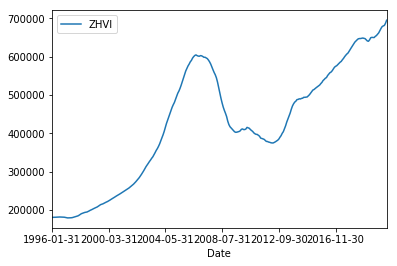

In [35]:
import matplotlib.pyplot as plt
plt.figure()
la_county = county_dfs["Los Angeles County"]
print(la_county.tail())
la_county.plot(x='Date', y='ZHVI')

In [ ]:
months_in_year = 12
period = 5 * months_in_year
